In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [228]:
df=pd.read_csv("voice.csv")

In [229]:
df.shape

(3168, 21)

# 1. Remove / Handle null values (if any).

In [230]:
df.isnull().sum() #Checking number of null values column vise.

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

# Check for duplicates.

In [231]:
df.duplicated().sum()

2

In [232]:
"""Handling the duplicates"""
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())
print(df.shape)

0
(3166, 21)


# Encoding the Label.

In [233]:
"""Encoding the Label column"""

from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()

df["label"]=lb.fit_transform(df["label"])

In [234]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


# 2. Depict percentage distribution of label on a pie chart.

<AxesSubplot:ylabel='label'>

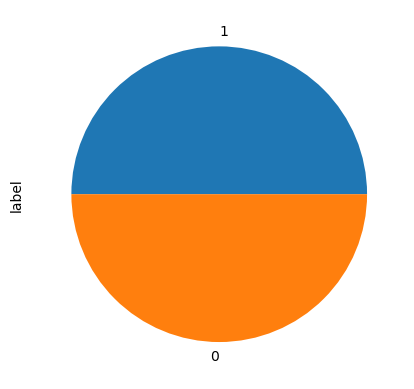

In [236]:
df["label"].value_counts().plot.pie()

# 3. Considering all the features as independent and label as dependent                    feature, split the dataset training and testing data with test size=20%.

In [237]:
x=df.drop("label",axis=1)  #data frame  x --> independent.
y=df["label"]              #series      y --> dependent.
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3166, 20)
(3166,)


In [238]:
#spliting the data to train and test

from sklearn.model_selection import train_test_split

"""Spliting the Training Data and Test Data with test size of 20% from total size"""
                                                            # |
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)


# 4. Apply the following classifier models on training dataset and generate                predictions for the test data set.

In [239]:
"""Generating confusion matrix,Classification report and accuracy"""

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,ypred):
    print("\nConfusion Matrix : \n",confusion_matrix(y_test,ypred))
    print("\nClassification Report : \n",classification_report(y_test,ypred))
    print("\nAccuracy Score : ",accuracy_score(y_test,ypred))
    
def mscore(model):
    print("\nTraining Score",model.score(x_train,y_train))
    print("\nTraining Score",model.score(x_test,y_test))

# a. Decision Tree Classifier

In [240]:
from sklearn.tree import DecisionTreeClassifier

Dtc= DecisionTreeClassifier(criterion="gini",max_depth=40,min_samples_split=15)

Dtc.fit(x_train,y_train)

ypredDTC=Dtc.predict(x_test)

print(ypredDTC)

eval_model(y_test,ypredDTC)

mscore(Dtc)

[1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1
 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0
 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0
 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1
 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0
 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0
 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1
 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1
 0 0 1 0 1 0 1 0 1 1 1 0 

# b. Random Forest Classifier

In [241]:
from sklearn.ensemble import RandomForestClassifier

Rfc= RandomForestClassifier(n_estimators=65,criterion="gini",max_depth=28,min_samples_split=15)

Rfc.fit(x_train,y_train)

ypredRFC=Rfc.predict(x_test)

print(ypredRFC)

eval_model(y_test,ypredRFC)

mscore(Rfc)

[1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1
 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0
 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0
 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1
 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0
 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0
 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0
 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1
 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1
 0 0 1 0 1 0 1 0 1 1 1 0 

# c. KNN Classifier

In [242]:
from sklearn.neighbors import KNeighborsClassifier

import warnings

warnings.filterwarnings("ignore")

Knn=KNeighborsClassifier(n_neighbors=17)

Knn.fit(x_train,y_train)

ypredKNN=Knn.predict(x_test)

print(ypredKNN)

eval_model(y_test,ypredKNN)

mscore(Knn)



[1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0
 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0
 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1
 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1
 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1
 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1
 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1
 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1
 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1
 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 

# d.  Logistic Regression-->

In [243]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(solver='lbfgs', max_iter=1000)

logreg.fit(x_train,y_train)

ypredLR=logreg.predict(x_test)

print(ypredLR)

eval_model(y_test,ypredLR)

mscore(logreg)


[1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1
 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1
 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0
 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0
 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1
 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0
 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0
 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0
 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1
 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0
 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1
 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1
 0 1 1 0 1 0 1 1 1 1 1 0 

# e. SVM Classifier

In [245]:
from sklearn.svm import SVC

Svm=SVC(kernel="linear",C=1)

Svm.fit(x_train,y_train)

ypredSVM=Svm.predict(x_test)

print(ypredSVM)

eval_model(y_test,ypredSVM)

mscore(Svm)

[1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1
 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1
 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0
 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0
 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1
 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0
 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0
 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0
 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1
 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1
 0 1 1 0 1 0 1 1 1 1 1 0 

# 5.  Also generate confusion_matrix and classification report for each model             generated in Q4.

# a. Confusion matrix and Classification Report of Decision Tree Classifier

In [246]:
print(ypredDTC)

eval_model(y_test,ypredDTC)

mscore(Dtc)

[1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1
 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0
 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0
 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1
 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0
 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0
 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1
 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1
 0 0 1 0 1 0 1 0 1 1 1 0 

# b. Confusion matrix and Classification Report of Random Forest Classifier

In [222]:
print(ypredRFC)

eval_model(y_test,ypredRFC)

mscore(Rfc)

[1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1
 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1
 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0
 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0
 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1
 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0
 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0
 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0
 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1
 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1
 0 0 1 0 1 0 1 0 1 1 1 0 

# c. Confusion matrix and Classification Report of KNN Classifier

In [247]:
print(ypredKNN)

eval_model(y_test,ypredKNN)

mscore(Knn)

[1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0
 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0
 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1
 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1
 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1
 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1
 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1
 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1
 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1
 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 

# d.  Confusion matrix and Classification Report of Logistic Regression

In [248]:
print(ypredLR)

eval_model(y_test,ypredLR)

mscore(logreg)

[1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1
 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1
 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0
 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0
 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1
 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0
 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0
 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0
 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1
 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0
 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1
 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1
 0 1 1 0 1 0 1 1 1 1 1 0 

# e. Confusion matrix and Classification Report of SVM Classifier

In [249]:
print(ypredSVM)

eval_model(y_test,ypredSVM)

mscore(Svm)

[1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1
 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1
 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0
 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0
 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1
 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0
 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0
 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1
 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0
 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1
 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1
 0 1 1 0 1 0 1 1 1 1 1 0 

# 6. Report the model with the best accuracy.

In [250]:
print("\nAccuracy Score of Decision Tree classifier : ",accuracy_score(y_test,ypredDTC))
print("\nAccuracy Score of Random Forest Classifier : ",accuracy_score(y_test,ypredRFC))
print("\nAccuracy Score of KNN Classifier           : ",accuracy_score(y_test,ypredKNN))
print("\nAccuracy Score of Logistic Regression      : ",accuracy_score(y_test,ypredLR))
print("\nAccuracy Score of SVM Classifier           : ",accuracy_score(y_test,ypredSVM))


Accuracy Score of Decision Tree classifier :  0.9637223974763407

Accuracy Score of Random Forest Classifier :  0.9779179810725552

Accuracy Score of KNN Classifier           :  0.6908517350157729

Accuracy Score of Logistic Regression      :  0.9211356466876972

Accuracy Score of SVM Classifier           :  0.9479495268138801


# """From the above obesrvations we can conclude that The Model with the Best Accuracy is Random Forest Classifier Model with 97.79% Accuracy and The Model with the least Accuracy is KNN Classifier Model with 69.08% Accuracy."""